In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from pandas.plotting import scatter_matrix
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5233,ham,Hey what how about your project. Started aha da.,NaN,NaN,NaN
62,ham,Its a part of checking IQ,NaN,NaN,NaN
1437,ham,Wat so late still early mah. Or we juz go 4 di...,NaN,NaN,NaN
5442,ham,"I thought i'd get him a watch, just cos thats ...",NaN,NaN,NaN
4283,ham,Yes. I come to nyc for audiitions and am tryin...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace= True,axis=1)

In [8]:
df.rename(columns={"v1":"y","v2":"x"},inplace = True)

In [9]:
df.sample(5)

,y,x
966,ham,I am not sure about night menu. . . I know onl...
790,ham,This is hoping you enjoyed your game yesterday...
5426,ham,Oh yeah! And my diet just flew out the window
558,ham,Hi Princess! Thank you for the pics. You are v...
1035,ham,"Hello baby, did you get back to your mom's ? A..."


In [10]:
encode = LabelEncoder()

In [11]:
df["y"]=encode.fit_transform(df["y"])

In [12]:
df.head()

,y,x
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

y    0
x    0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep = 'first')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       5169 non-null   int64 
 1   x       5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [17]:
df['y'].value_counts()

0    4516
1     653
Name: y, dtype: int64

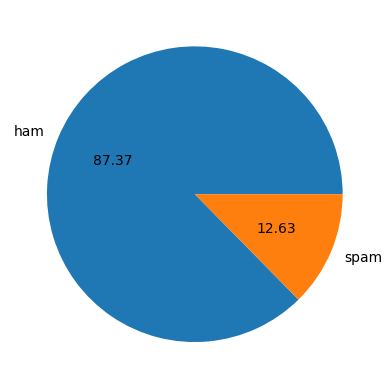

In [18]:
from pandas.core.arrays.interval import value_counts
plt.pie(df['y'].value_counts(),labels = ['ham',"spam"],autopct = "%0.2f")
plt.show()

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
df['num_char'] = df['x'].apply(len).copy()

In [21]:
df.head()

,y,x,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df["num_words"] = df['x'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df["num_sent"] = df['x'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.describe()

,y,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [25]:
#for ham MSG          0 for ham, 1 for span
df[df['y']==0].describe()

,y,num_char,num_words,num_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


<Axes: xlabel='num_char', ylabel='Count'>

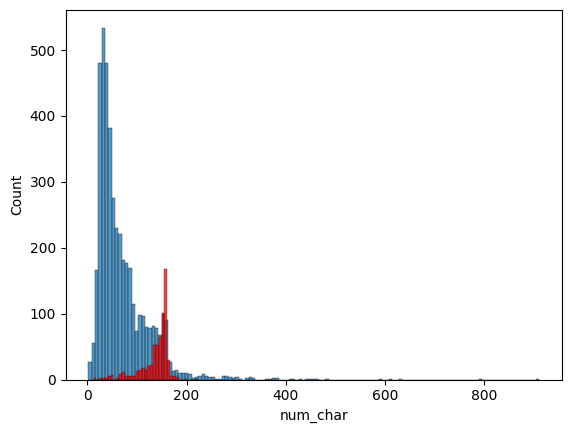

In [26]:
sns.histplot(df[df["y"]==0]['num_char'])
sns.histplot(df[df["y"]==1]['num_char'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

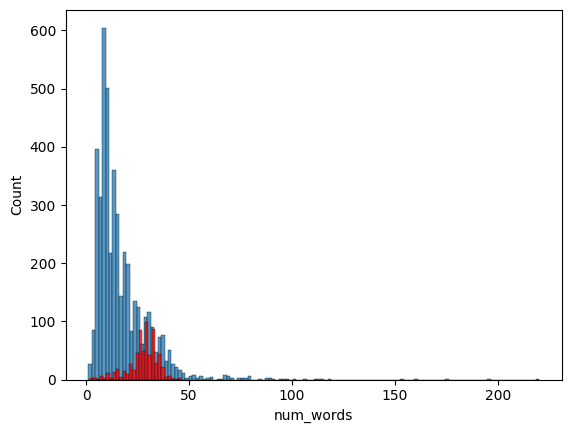

In [27]:
sns.histplot(df[df["y"]==0]['num_words'])
sns.histplot(df[df["y"]==1]['num_words'],color = 'red')

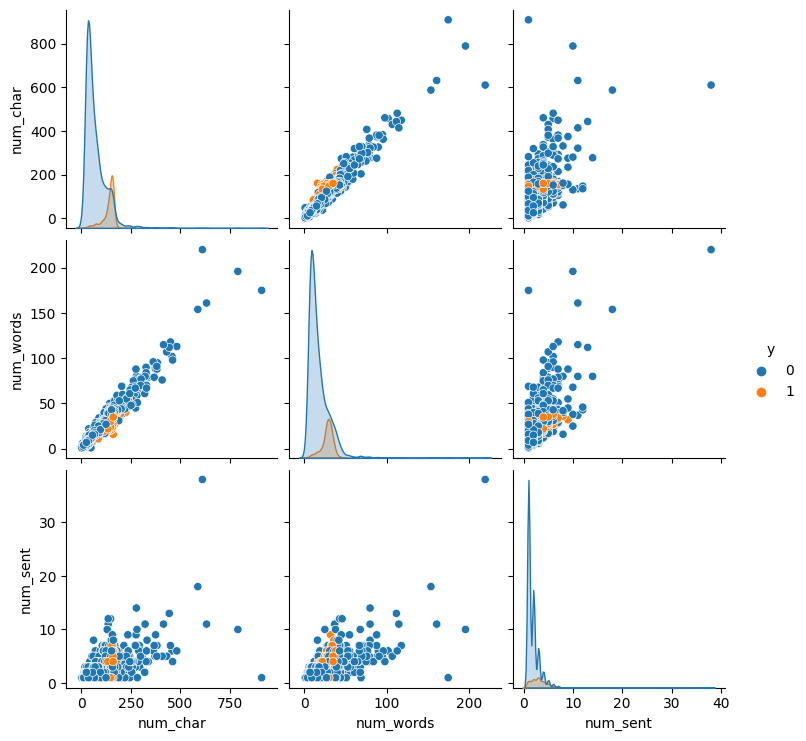

In [28]:
#a = ['num_char'	,'num_words'	,'num_sent']
#scatter_matrix(df[a],figsize = (8,8))

sns.pairplot(df,hue = 'y')

In [29]:
corr_matrix = df.corr()
corr_matrix['y']

<ipython-input-29-475d3f4e06d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


y            1.000000
num_char     0.384717
num_words    0.262912
num_sent     0.263939
Name: y, dtype: float64

<Axes: >

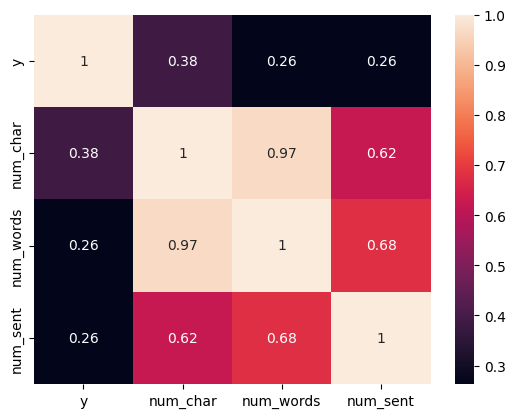

In [30]:
sns.heatmap(corr_matrix,annot=True)

In [31]:
from sqlalchemy.sql.sqltypes import String
def tran_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  list = []
  for i in text:
    if i.isalnum():
      list.append(i)
  text = list[:]
  list.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in  string.punctuation:
      list.append(i)
  text = list[:]
  list.clear()

  for i in text:
      list.append(ps.stem(i))
  return " ".join(list)


In [32]:
tran_text('I loved Fucking ')

'love fuck'

In [33]:
df['tran_text'] = df['x'].apply(tran_text)

In [34]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

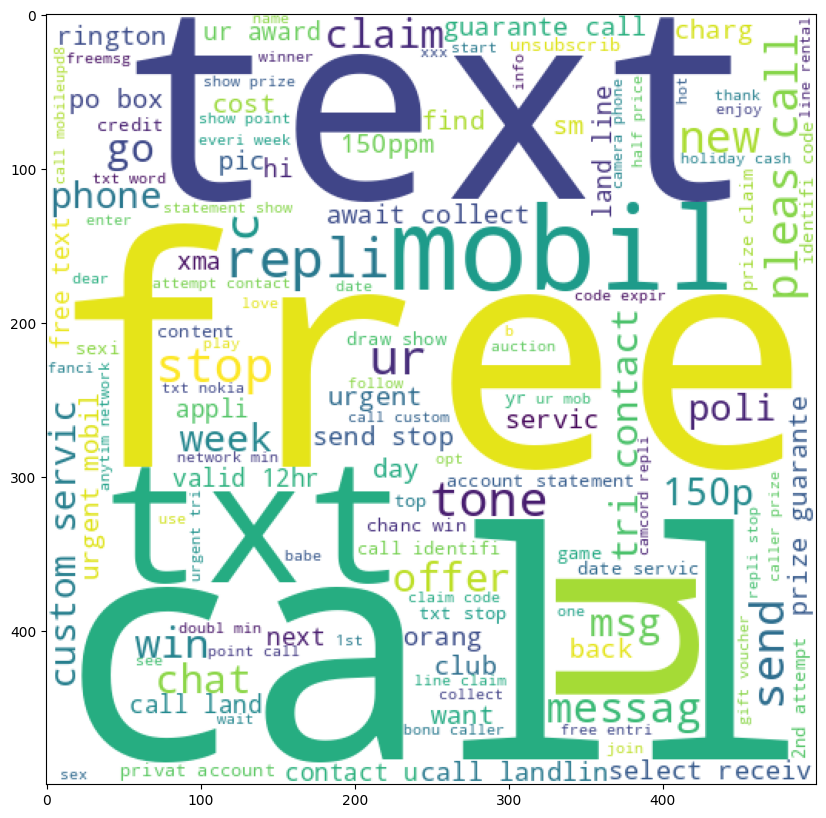

In [35]:
spam_wc = wc.generate(df[df['y']==1]['tran_text'].str.cat(sep=" "))
plt.figure(figsize = (10,10))
plt.imshow(spam_wc)

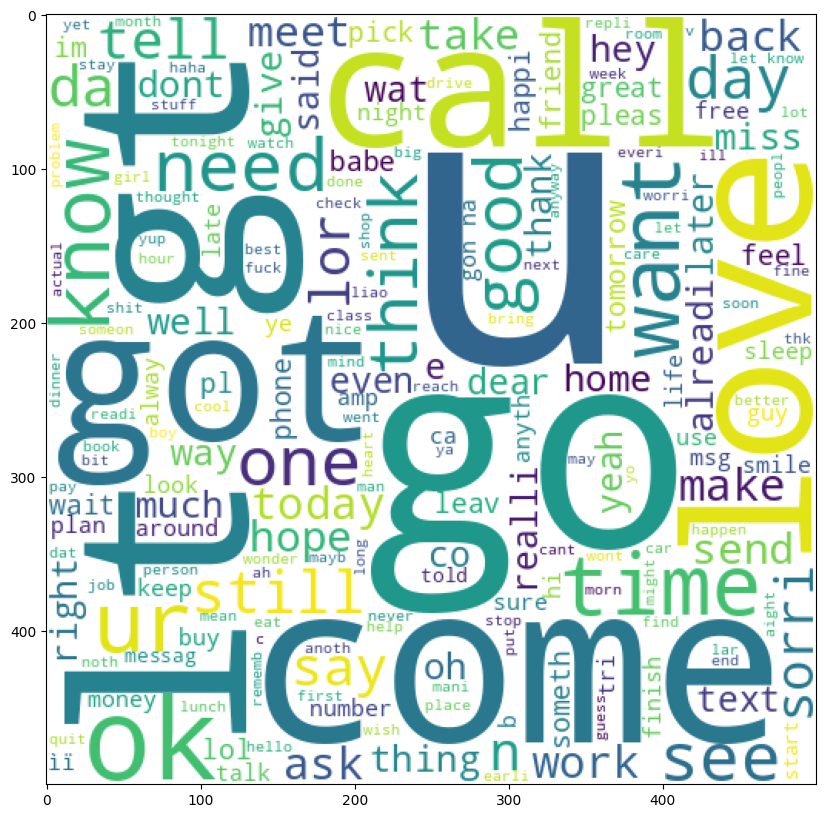

In [36]:
ham_wc = wc.generate(df[df['y']==0]['tran_text'].str.cat(sep=" "))
plt.figure(figsize = (10,10))
plt.imshow(ham_wc)

In [37]:
spam_word = []
for msg in df[df['y']==1]['tran_text'].tolist():
    for word in msg.split():
      spam_word.append(word)

In [38]:
len(spam_word)

9939

In [39]:
Counter(spam_word).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [40]:
#spam_data = pd.DataFrame(Counter(spam_word).most_common(30))
#sns.barplot(x='0',y='1',data = spam_data)
#plt.xticks(rotation = 'vertical')
#plt.show()

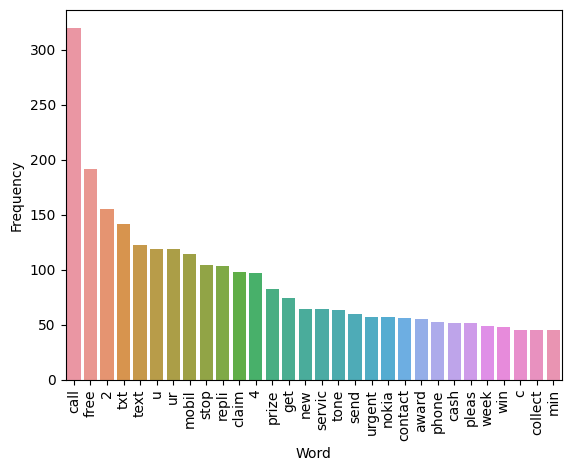

In [41]:
#from chatGPT
word_counter = Counter(spam_word)

# Convert word frequencies to a DataFrame and select the top 30 words
top_words_df = pd.DataFrame(word_counter.most_common(30), columns=['Word', 'Frequency'])

# Create a bar plot using Seaborn
sns.barplot(x='Word', y='Frequency', data=top_words_df)
plt.xticks(rotation = 'vertical')
plt.show()

In [42]:
ham_word = []
for msg in df[df['y']==0]['tran_text'].tolist():
    for word in msg.split():
      ham_word.append(word)

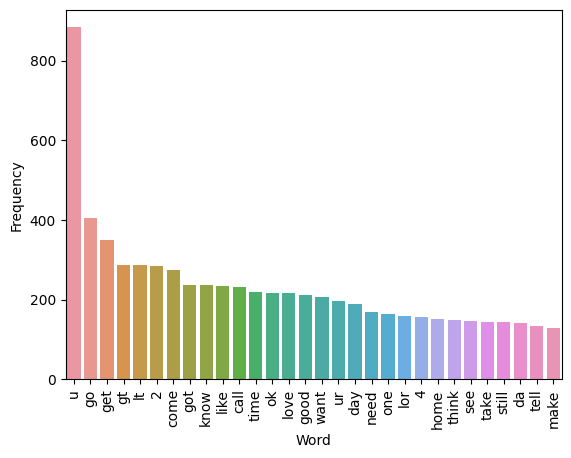

In [43]:
#from chatGPT
word_counter = Counter(ham_word)

# Convert word frequencies to a DataFrame and select the top 30 words
top_words_df = pd.DataFrame(word_counter.most_common(30), columns=['Word', 'Frequency'])

# Create a bar plot using Seaborn
sns.barplot(x='Word', y='Frequency', data=top_words_df)
plt.xticks(rotation = 'vertical')
plt.show()

In [44]:
cv = CountVectorizer()
tf = TfidfVectorizer(max_features = 3000)
#x = cv.fit_transform(df['tran_text']).toarray()
x = tf.fit_transform(df['tran_text']).toarray()
y = df['y'].values

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42 )

In [46]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [47]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [48]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [49]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [50]:
import pickle
pickle.dump(tf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))